PROJECT IN PROGRESS...

#Library to install

In [ ]:
pip install speechbrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.1/760.1 kB 10.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
!pip install umap-learn
import umap.umap_ as umap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 7.2 MB/s eta 0:00:00


#Get dataset Librispeech

In [ ]:
import zipfile
import os
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir /content/libriSpeech/
!mkdir /content/libriSpeech/val_data
!mkdir /content/libriSpeech/train_data

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/LibriSpeech/dev_clean.zip', 'r') as zip_ref:
        zip_ref.extractall('/content/libriSpeech/val_data')
with zipfile.ZipFile('/content/drive/MyDrive/LibriSpeech/train-clean-100.zip', 'r') as zip_ref:
        zip_ref.extractall('/content/libriSpeech/train_data')

>Trying xVectors

#Data Exploring

In [ ]:
import speechbrain
from speechbrain.inference.speaker import EncoderClassifier

import torch
import torchaudio

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

import umap.umap_ as umap

In [ ]:
def Data_to_Index(file, columns, subsest_position, columns_to_drop=['']):
  df = pd.read_csv(file, delimiter='\t')
  rows = []
  for i in range(len(df)):
    rows.append(df.iloc[i][0].split('|'))
  df = pd.DataFrame(rows, columns=columns)
  my_dataset = []
  for i in range(len(rows)):
      row = [i.strip() for i in df.iloc[i]]
      if row[subsest_position] == 'train-clean-100' or row[subsest_position] == 'dev-clean':
        my_dataset.append(row)
  my_dataset = pd.DataFrame(my_dataset, columns=columns)
  my_dataset.drop(columns=columns_to_drop, inplace=True)
  return my_dataset

In [ ]:
filePATH = '/content/speakers.TXT'
columns = ['ID_SPEAKER', 'SEX', 'SUBSET', 'MINUTES', 'NAME']
subsest_position = 2
columns_to_drop = ['MINUTES','SUBSET']
speaker_data = Data_to_Index(filePATH, columns, subsest_position, columns_to_drop)

In [ ]:
filePATH = '/content/chapters.TXT'
columns = ['ID_CHAPTER','ID_SPEAKER','MINUTES', 'SUBSET', 'PROJ', 'ID_BOOK', 'CH TITLE', 'PROJ TITLE']
subsest_position = 3
columns_to_drop = ['MINUTES','SUBSET','PROJ']
chapter_data = Data_to_Index(filePATH, columns, subsest_position, columns_to_drop)

In [ ]:
def female_male(letter):
  return y_speaker

def to_index(data):
  indexNo_chapter = chapter_data[chapter_data['ID_SPEAKER'] == data].index
  indexNo_speaker = speaker_data[speaker_data['ID_SPEAKER'] == data].index
  return indexNo_chapter[0], indexNo_speaker[0]

>Creación de Dataset_X_vectors

In [ ]:
def Obtain_x_vectors(folder_path):
  y_speaker = []
  path = folder_path
  classifier = EncoderClassifier.from_hparams(source="speechbrain/spkrec-xvect-voxceleb", savedir="pretrained_models/spkrec-xvect-voxceleb")
  dataset_x_vector = []
  for folder in sorted(os.listdir(path)):
    speakerIndex = to_index(folder)
    for folder2 in os.listdir(path + '/' + folder):
      for folder3 in os.listdir(path + '/' + folder + '/' + folder2):
        if folder3[-5:] == '.flac':
          y_speaker.append(speakerIndex)
          signal, fs = torchaudio.load(path + '/' + folder + '/' + folder2 + '/' + folder3)
          x_vector = classifier.encode_batch(signal).reshape([512])
          dataset_x_vector.append(x_vector)

  return dataset_x_vector, y_speaker


In [ ]:
Valid_Xvectors, y_val = Obtain_x_vectors('/content/libriSpeech/val_data')
Train_Xvectors, y_train = Obtain_x_vectors('/content/libriSpeech/train_data/train-clean-100')

In [ ]:
np.save('/content/drive/MyDrive/LibriSpeech/train_xvector_LS.npy', Train_Xvectors)
np.save('/content/drive/MyDrive/LibriSpeech/valid_xvector_LS.npy', Valid_Xvectors)
np.save('/content/drive/MyDrive/LibriSpeech/y_train_xvector_LS.npy', y_train)
np.save('/content/drive/MyDrive/LibriSpeech/y_valid_xvector_LS.npy', y_val)

In [ ]:
Train_Xvectors = np.load('/content/drive/MyDrive/LibriSpeech/train_xvector_LS.npy')
Valid_Xvectors = np.load('/content/drive/MyDrive/LibriSpeech/valid_xvector_LS.npy')
y_Train = np.load('/content/drive/MyDrive/LibriSpeech/y_train_xvector_LS.npy')
y_Valid = np.load('/content/drive/MyDrive/LibriSpeech/y_valid_xvector_LS.npy')

> Creación de y_persona, y_sexo, y_capítulo

In [ ]:
dicc_sexo = {'M':0,'F':1}
dicc_persona = {c: i for i, c in enumerate(speaker_data['NAME'])}
dicc_nombre_capitulo = {c: i for i, c in enumerate(chapter_data['CH TITLE'])}

In [ ]:
persona = []
sexo = []
nombre_capitulo = []

for y in y_Train:
  persona.append(dicc_persona[speaker_data['NAME'][y[1]]])
  sexo.append(dicc_sexo[speaker_data['SEX'][y[1]]])
  nombre_capitulo.append(dicc_nombre_capitulo[chapter_data['CH TITLE'][y[0]]])

In [ ]:
y_persona = y_Train[:,1]
label_persona = list(dicc_persona.keys())

y_sexo = sexo
label_sexo = list(dicc_sexo.keys())

y_nombre_capitulo = nombre_capitulo
label_nombre_capitulo = list(dicc_nombre_capitulo.keys())

In [ ]:
plotdata = []
pca = PCA(n_components=2)
pca_plot = pca.fit(Train_Xvectors)
plot = pca.transform(Train_Xvectors)

In [ ]:
def plot2d(x,y,labels):
  plt.figure(figsize=(5,5))
  sc = plt.scatter(x[:,0],x[:,1],c=y)
  plt.rcParams['font.family'] = 'sans-serif'
  plt.legend(handles=sc.legend_elements()[0], labels=labels)
  plt.show

In [ ]:
print(Train_Xvectors.shape)
len(label_nombre_capitulo)

(27917, 512)


639

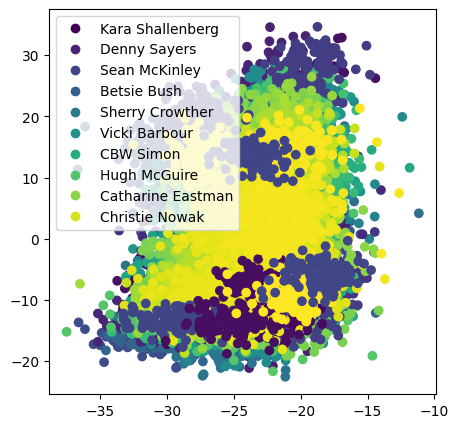

In [ ]:
plot2d(Train_Xvectors,y_persona,label_persona)

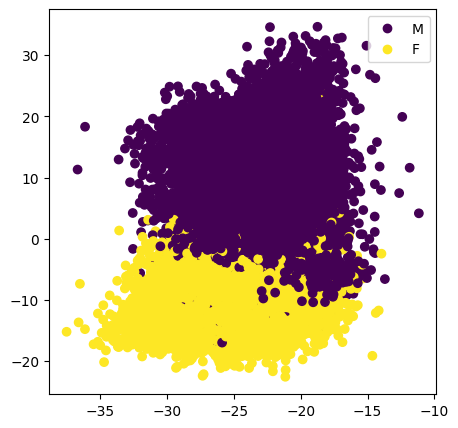

In [ ]:
plot2d(Train_Xvectors,y_sexo,label_sexo)

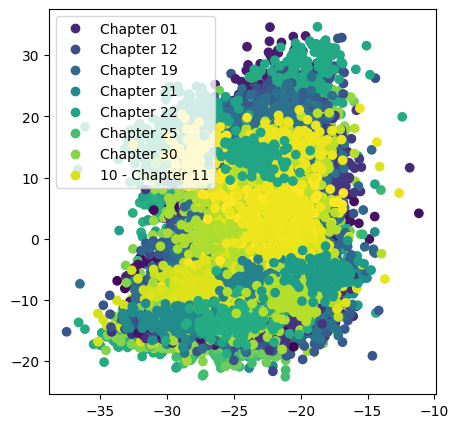

In [ ]:
plot2d(Train_Xvectors,y_nombre_capitulo,label_nombre_capitulo)

In [ ]:
x_umap2_StadisticsGlottal_CreamD = umap.UMAP(n_neighbors=100,n_components=2,min_dist=0.1,metric='euclidean').fit_transform(Train_Xvectors,y_sexo)
plot2d(x_umap2_StadisticsGlottal_CreamD,y_sexo,label_sexo)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


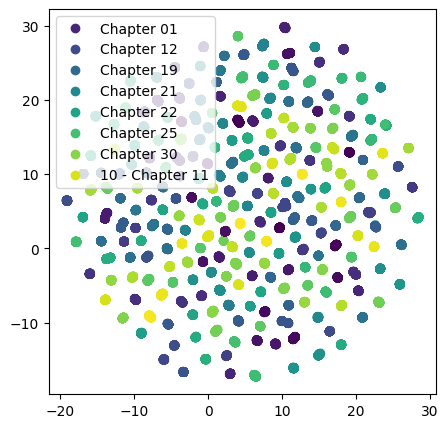

In [ ]:
x_umap2_StadisticsGlottal_CreamD = umap.UMAP(n_neighbors=100,n_components=2,min_dist=0.1,metric='euclidean').fit_transform(Train_Xvectors,y_nombre_capitulo)
plot2d(x_umap2_StadisticsGlottal_CreamD,y_nombre_capitulo,label_nombre_capitulo)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


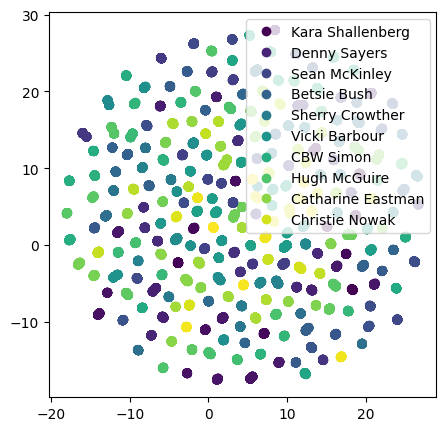

In [ ]:
x_umap2_StadisticsGlottal_CreamD = umap.UMAP(n_neighbors=100,n_components=2,min_dist=0.1,metric='euclidean').fit_transform(Train_Xvectors,y_persona)
plot2d(x_umap2_StadisticsGlottal_CreamD,y_persona,label_persona)

#Autoencoders

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from google.colab import drive

from sklearn.datasets import load_wine, load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score

import torch
from torch.nn import Sequential
from torch.nn import Linear, Sigmoid, Tanh, ReLU, LeakyReLU, Bilinear
from torch.optim import Adam
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader

In [ ]:
!kaggle datasets download -d marianarodrguez/emotionaudio-librispeech

Dataset URL: https://www.kaggle.com/datasets/marianarodrguez/emotionaudio-librispeech
License(s): unknown
100% 10.3G/10.3G [02:07<00:00, 163MB/s]
100% 10.3G/10.3G [02:07<00:00, 86.7MB/s]


In [ ]:
with zipfile.ZipFile('/content/emotionaudio-librispeech.zip', 'r') as zip_ref:
        zip_ref.extractall('/content/')

In [ ]:
embeds_ls_train = np.load('/content/X_vectors/train_xvector_LS.npy')
embeds_ls_val = np.load('/content/X_vectors/valid_xvector_LS.npy')

##data analysis

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
embeds_ls_train_scale = scaler_X.fit_transform(embeds_ls_train)
embeds_ls_val_scale = scaler_X.transform(embeds_ls_val)

In [ ]:
df_train = pd.DataFrame(embeds_ls_train)
df_valid = pd.DataFrame(embeds_ls_val)

In [ ]:
df_train_scale = pd.DataFrame(embeds_ls_train_scale)
df_valid_scale = pd.DataFrame(embeds_ls_val_scale)

In [ ]:
print(df_train_scale.shape)
print(df_valid_scale.shape)
print(df_train.shape)
print(df_valid.shape)

(27917, 512)
(2703, 512)
(27917, 512)
(2703, 512)


In [ ]:
df_train.describe()

0             1             2             3             4    \
count  27917.000000  27917.000000  27917.000000  27917.000000  27917.000000   
mean     -24.168289     -1.765712      9.144241      9.487353     -2.282305   
std        3.158599     10.508136      3.706118      3.168324      8.264408   
min      -37.525986    -22.541988     -5.416357     -4.463502    -29.827663   
25%      -26.317316    -10.313791      6.631683      7.351820     -8.336763   
50%      -24.078146     -4.541231      9.142912      9.404065     -2.504307   
75%      -21.944012      5.892562     11.643806     11.630202      3.364130   
max      -11.156568     34.631390     23.256365     21.715919     25.861826   

                5             6             7             8             9    \
count  27917.000000  27917.000000  27917.000000  27917.000000  27917.000000   
mean     -11.284139    -20.905119     -1.397349     11.913548      5.830450   
std        6.159506      3.696646     11.347724      4.119129      0.647422   
min      -29.902647    -33.952129    -30.667597     -5.806405      3.377772   
25%      -15.649777    -23.474073    -12.301019      9.120418      5.347653   
50%      -12.053069    -20.891584     -0.470401     11.973496      5.780528   
75%       -7.381081    -18.422714      8.878363     14.747026      6.333655   
max       15.467524     -6.000555     27.654161     26.374983      7.994885   

       ...           502           503           504           505  \
count  ...  27917.000000  27917.000000  27917.000000  27917.000000   
mean   ...    -21.056768     11.452260      3.443860     -4.409101   
std    ...      3.984648      3.428836      9.889365      0.437214   
min    ...    -37.461742     -2.169445    -31.870537     -6.095072   
25%    ...    -23.722103      9.190071     -3.689233     -4.700559   
50%    ...    -21.031872     11.492186      4.310795     -4.415474   
75%    ...    -18.341326     13.765160     10.913972     -4.126467   
max    ...     -7.515062     25.036146     31.857079     -1.696894   

                506           507           508           509           510  \
count  27917.000000  27917.000000  27917.000000  27917.000000  27917.000000   
mean     -10.616660     11.030141     16.820202     -0.636593     12.278920   
std        8.883958      3.156632      4.304209      8.815987      2.411032   
min      -29.119020     -2.896096      1.736615    -31.133297      0.308566   
25%      -18.372869      8.948163     13.811303     -7.026572     10.698264   
50%      -12.688088     11.061371     16.730490      0.938318     12.251142   
75%       -3.116523     13.141244     19.853804      6.416391     13.865745   
max       14.403009     24.136427     34.214493     17.707134     23.422178   

                511  
count  27917.000000  
mean     -19.554998  
std        3.335578  
min      -32.786510  
25%      -21.753357  
50%      -19.686096  
75%      -17.413502  
max       -5.206483  

[8 rows x 512 columns]

<Axes: >

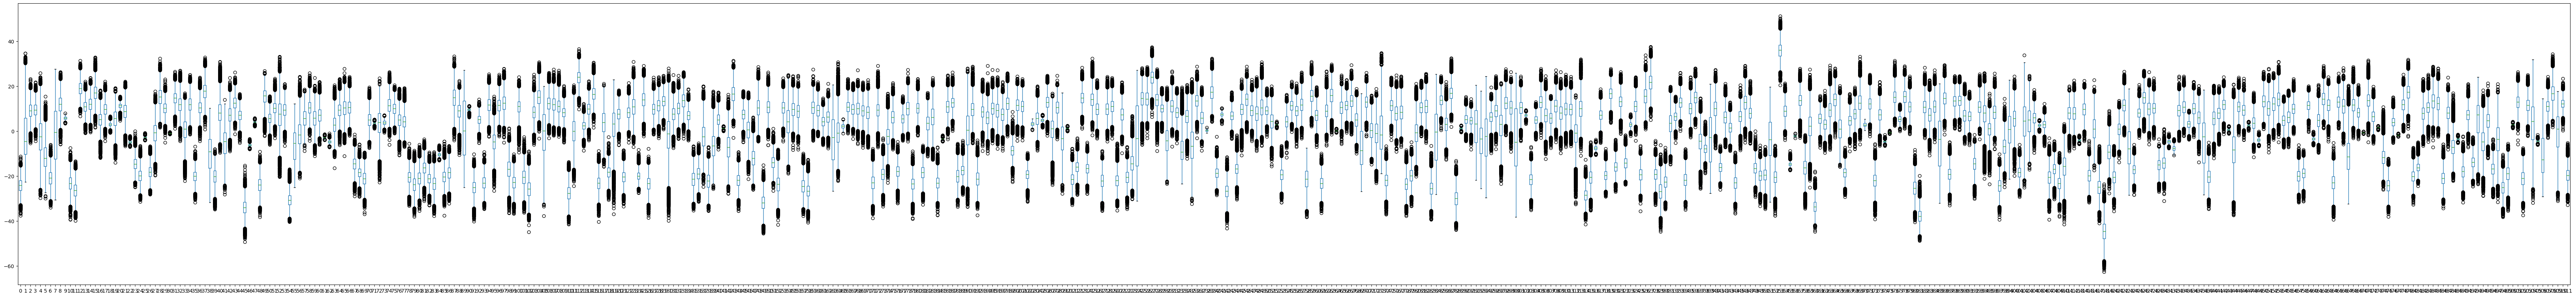

In [ ]:
df_train.boxplot(grid=False,figsize=(90,10))

<Axes: >

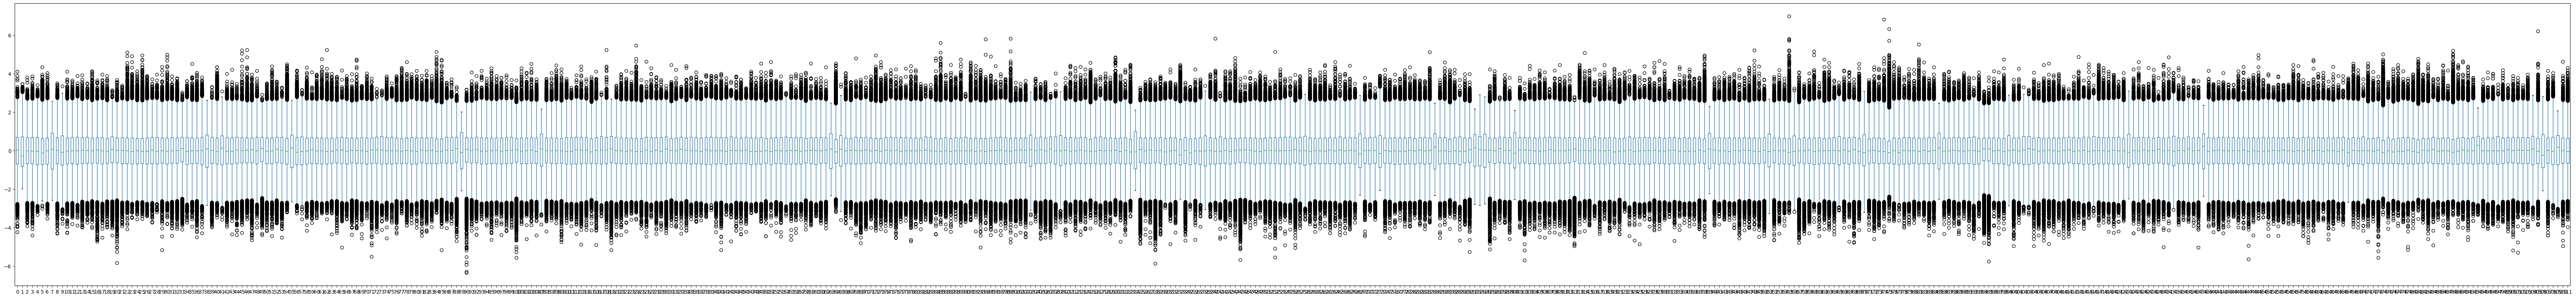

In [ ]:
df_train_scale.boxplot(grid=False,figsize=(90,10))

<Axes: >

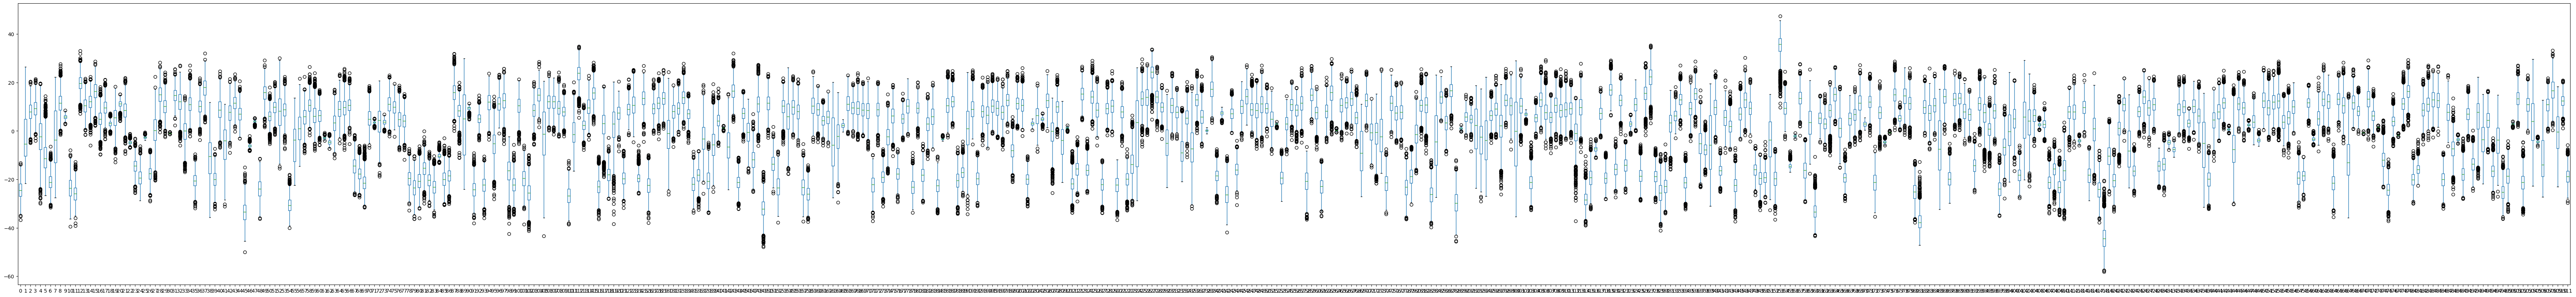

In [ ]:
df_valid.boxplot(grid=False,figsize=(90,10))

<Axes: >

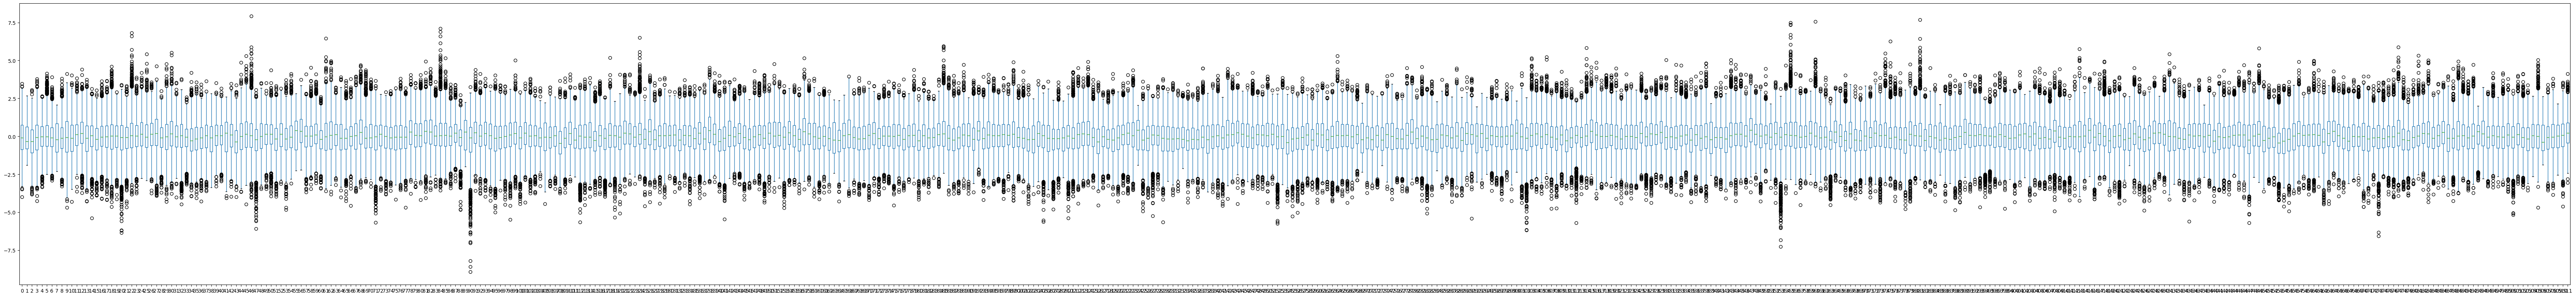

In [ ]:
df_valid_scale.boxplot(grid=False,figsize=(90,10))

In [ ]:
df_train.describe().iloc[1].shape

(512,)

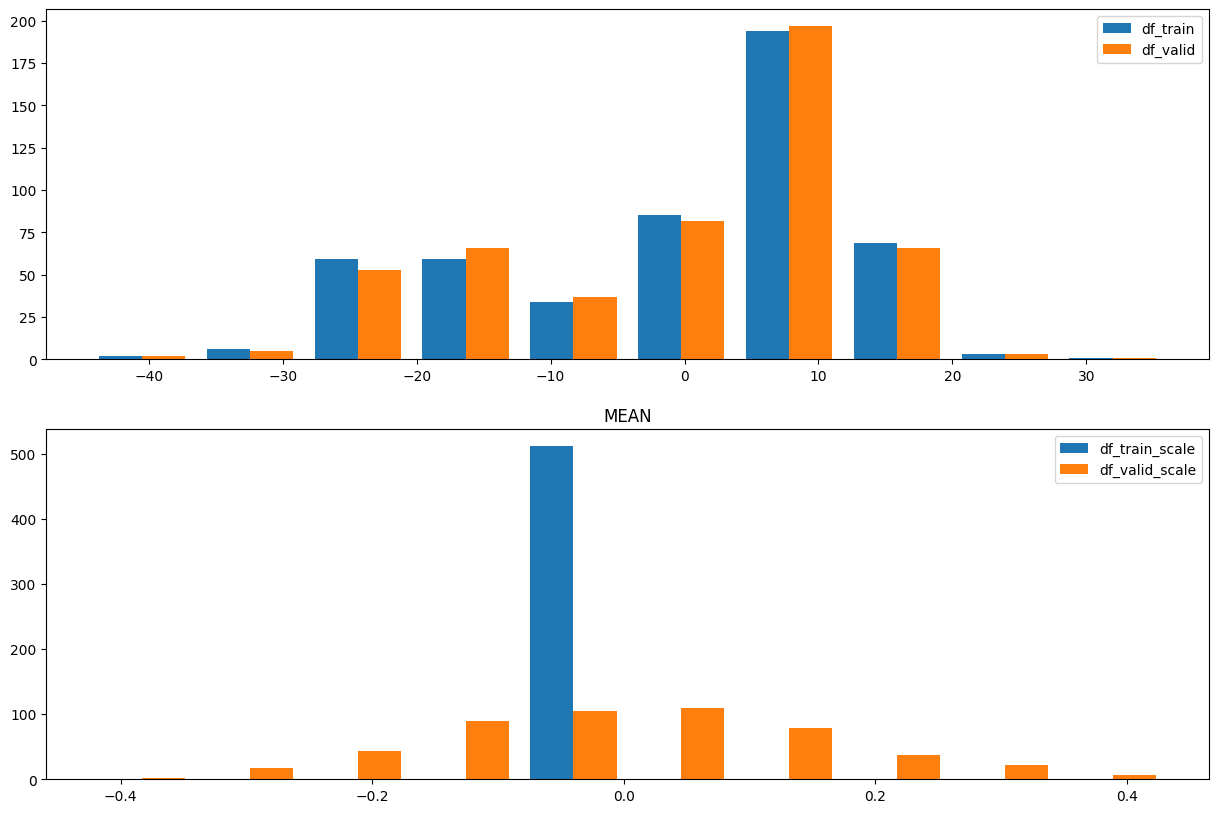

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(15,10))
plt.title('MEAN')
axes[0].hist([df_train.describe().iloc[1], df_valid.describe().iloc[1]],
         stacked=False)
axes[0].legend(['df_train', 'df_valid'])


axes[1].hist([df_train_scale.describe().iloc[1], df_valid_scale.describe().iloc[1]],
         stacked=False);
axes[1].legend(['df_train_scale', 'df_valid_scale']);

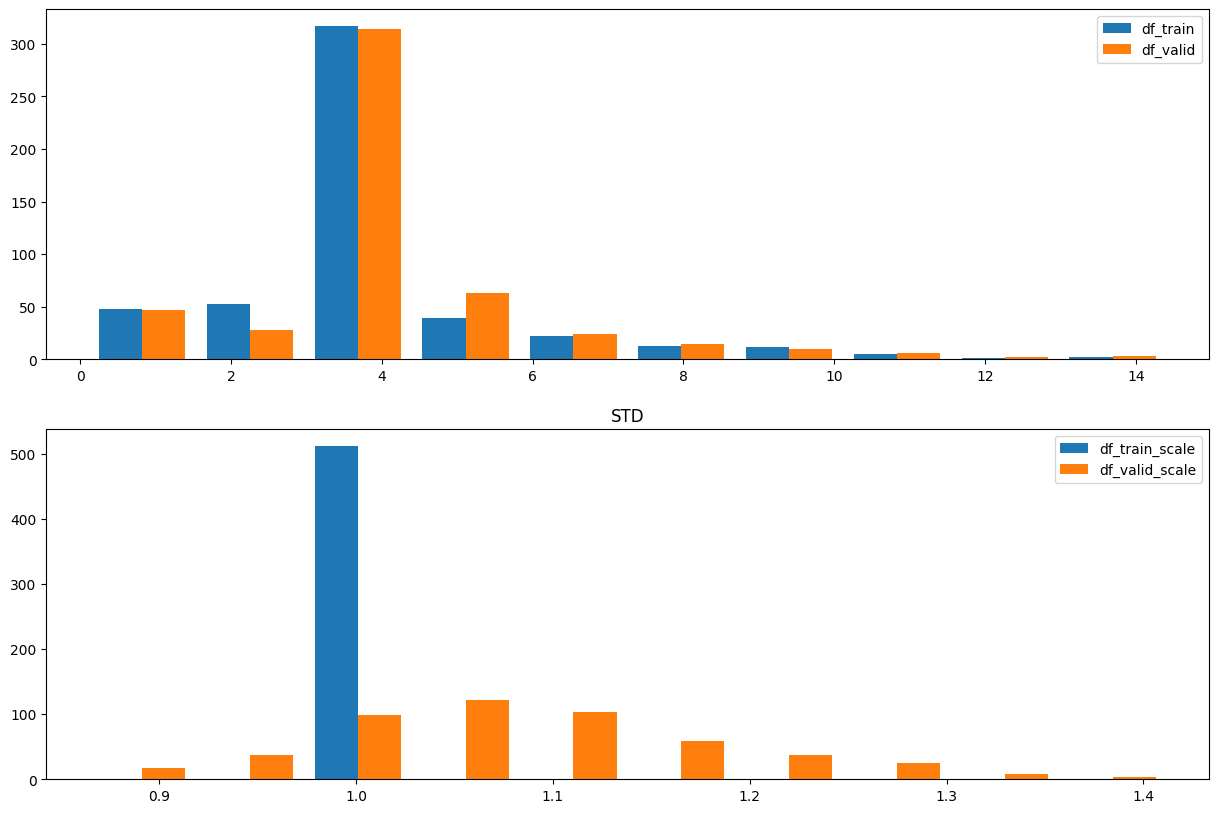

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(15,10))
plt.title('STD')
axes[0].hist([df_train.describe().iloc[2], df_valid.describe().iloc[2]],
         stacked=False)
axes[0].legend(['df_train', 'df_valid'])


axes[1].hist([df_train_scale.describe().iloc[2], df_valid_scale.describe().iloc[2]],
         stacked=False);
axes[1].legend(['df_train_scale', 'df_valid_scale']);

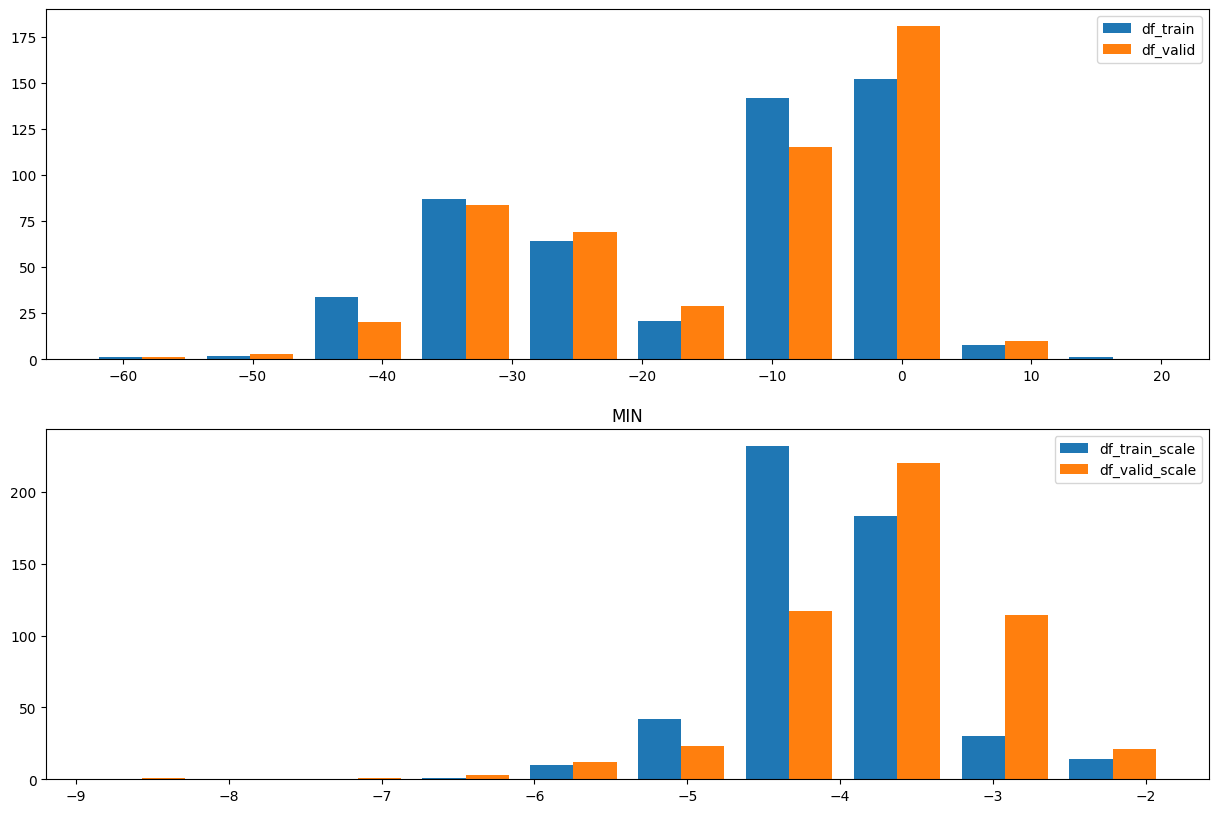

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(15,10))
plt.title('MIN')
axes[0].hist([df_train.describe().iloc[3], df_valid.describe().iloc[3]],
         stacked=False)
axes[0].legend(['df_train', 'df_valid'])


axes[1].hist([df_train_scale.describe().iloc[3], df_valid_scale.describe().iloc[3]],
         stacked=False);
axes[1].legend(['df_train_scale', 'df_valid_scale']);

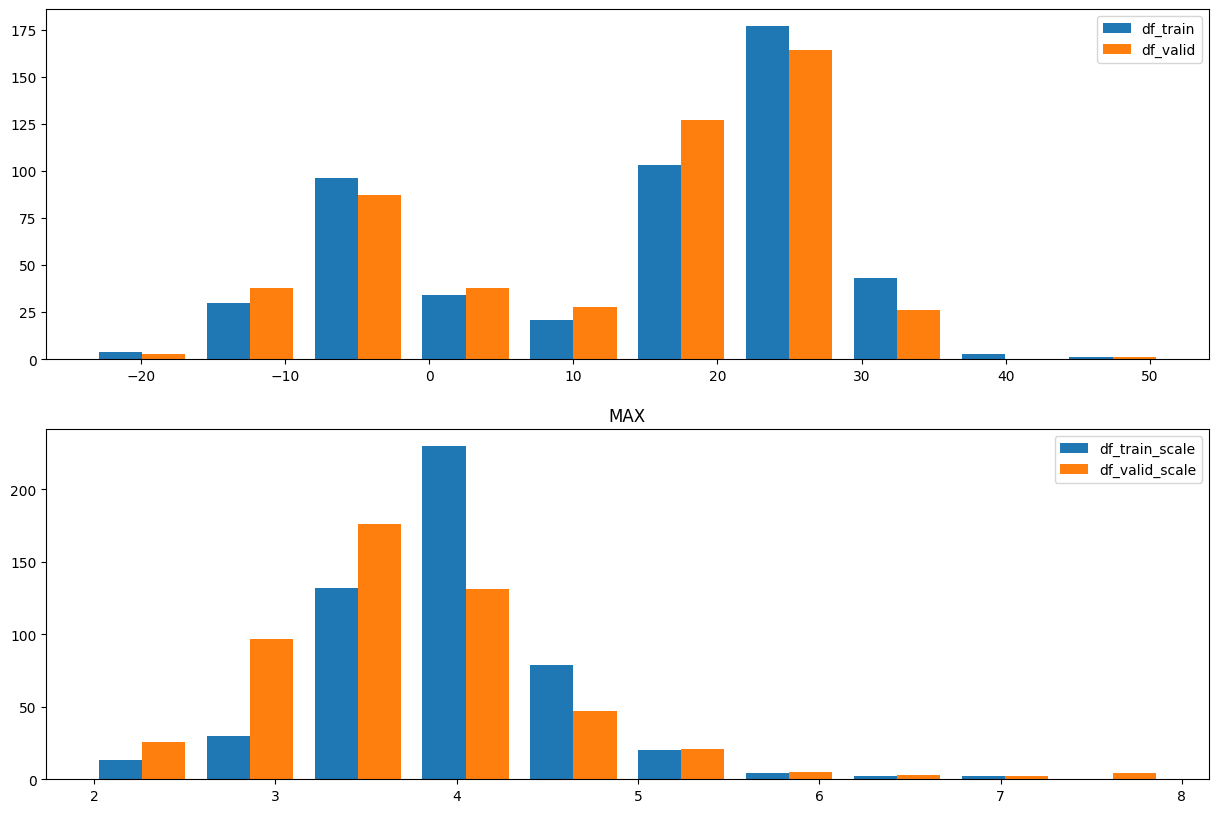

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(15,10))
plt.title('MAX')
axes[0].hist([df_train.describe().iloc[7], df_valid.describe().iloc[7]],
         stacked=False)
axes[0].legend(['df_train', 'df_valid'])


axes[1].hist([df_train_scale.describe().iloc[7], df_valid_scale.describe().iloc[7]],
         stacked=False);
axes[1].legend(['df_train_scale', 'df_valid_scale']);

In [ ]:
print('max')
print(np.max(embeds_ls_train))
print(np.max(embeds_ls_val))
print('min')
print(np.min(embeds_ls_train))
print(np.min(embeds_ls_val))
print('mean')
print(np.mean(np.abs(embeds_ls_train)))
print(np.mean(np.abs(embeds_ls_val)))
print('median')
print(np.median(np.abs(embeds_ls_train)))
print(np.median(np.abs(embeds_ls_val)))

max
51.158413
47.378563
min
-62.66532
-58.203827
mean
11.89856
11.780286
median
10.8554
10.763611


In [ ]:
def analysisEmbedings(arg1,arg2):
  plt.figure(figsize=(20,5))
  plt.stem(arg1)
  plt.stem(arg2,'black')
  plt.show()

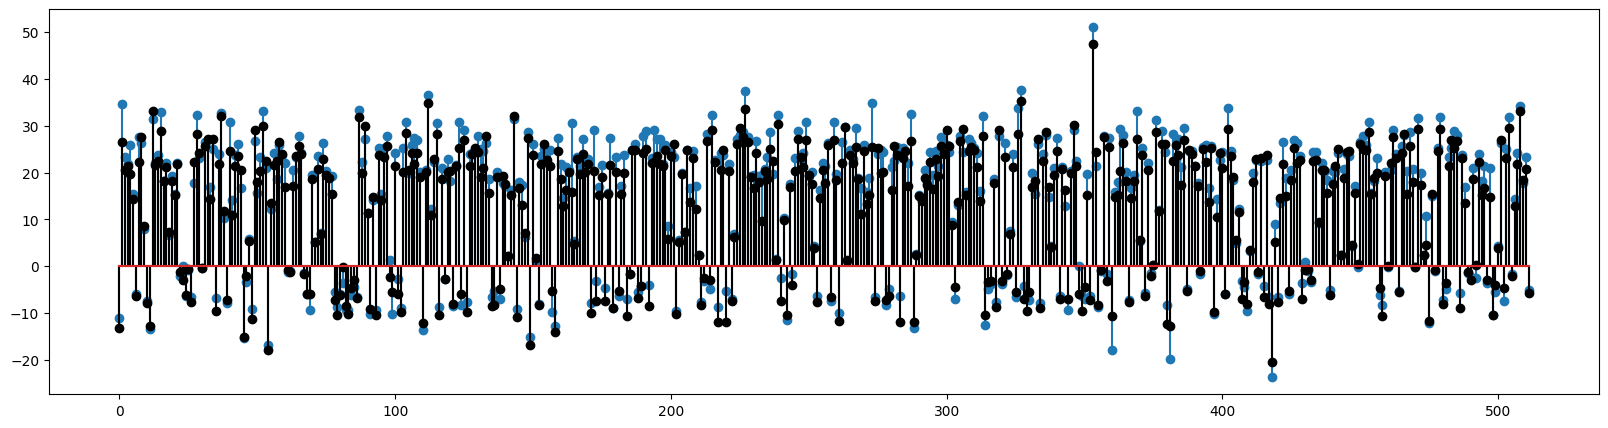

In [ ]:
analysisEmbedings(np.max(embeds_ls_train,axis=0),np.max(embeds_ls_val,axis=0))

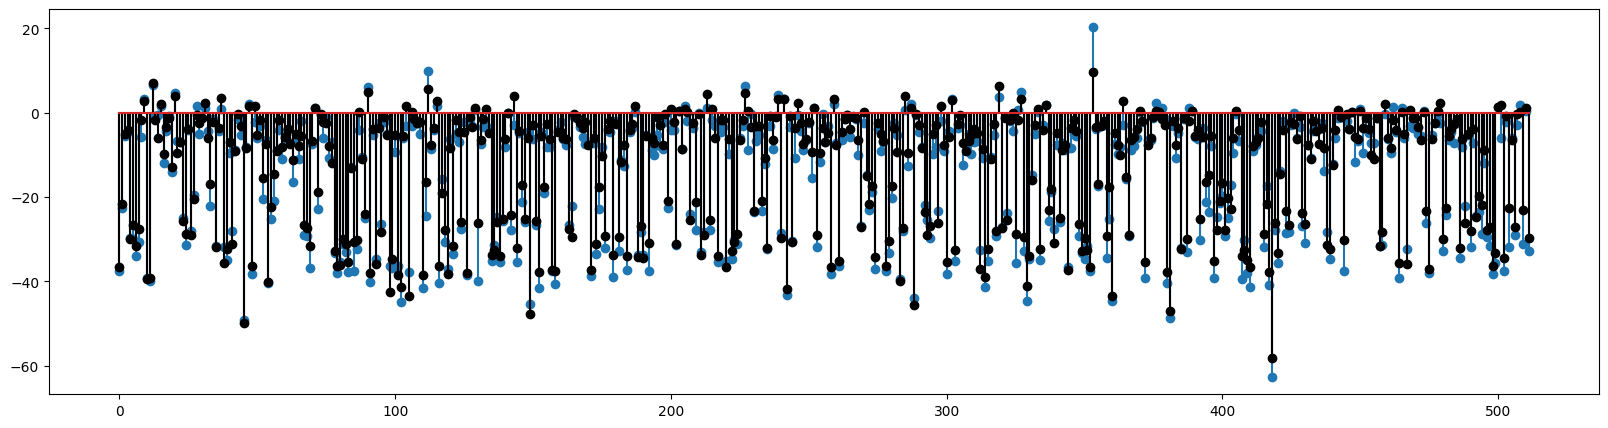

In [ ]:
analysisEmbedings(np.min(embeds_ls_train,axis=0),np.min(embeds_ls_val,axis=0))

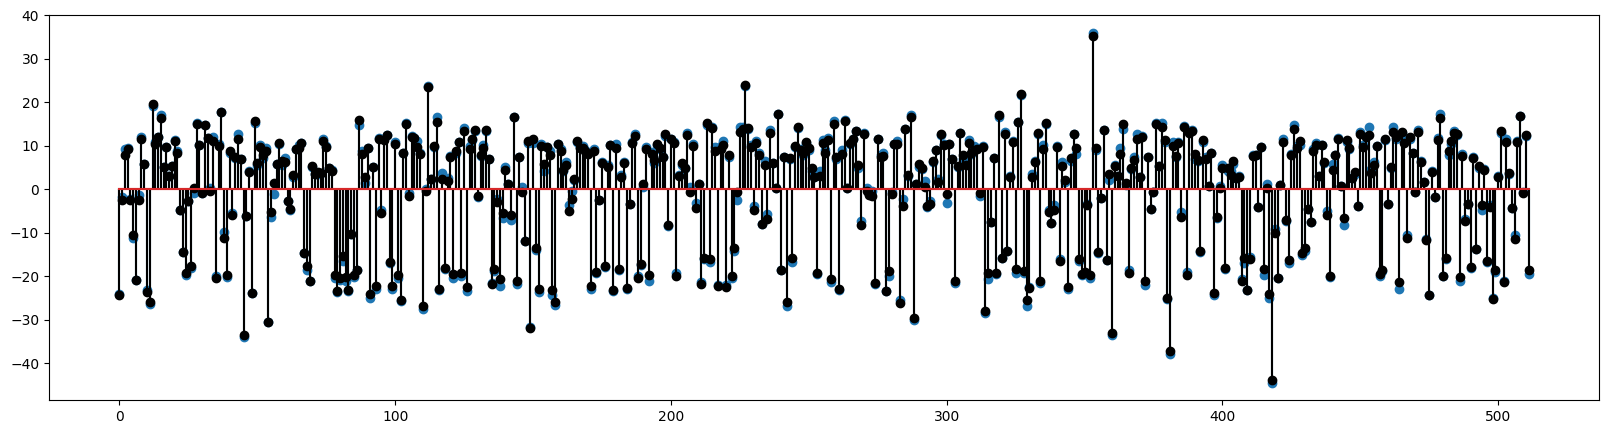

In [ ]:
analysisEmbedings(np.mean(embeds_ls_train,axis=0),np.mean(embeds_ls_val,axis=0))

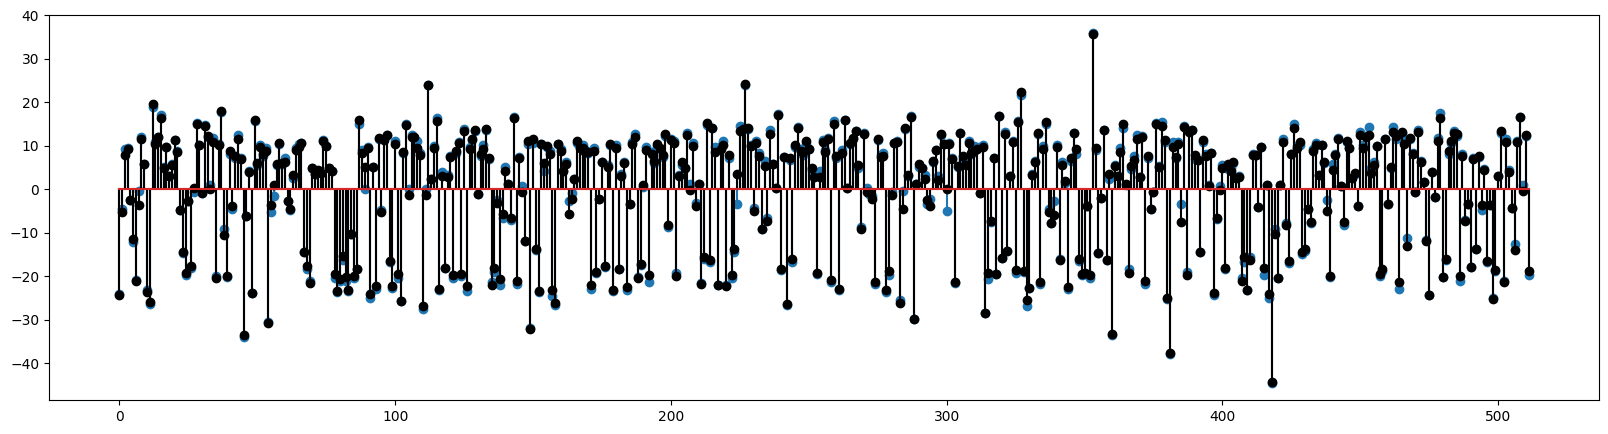

In [ ]:
analysisEmbedings(np.median(embeds_ls_train,axis=0),np.median(embeds_ls_val,axis=0))

> Tomamos el 10% de los datos de entrenamiento y de validación

##code

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from google.colab import drive

from sklearn.datasets import load_wine, load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score

import torch
from torch.nn import Sequential
from torch.nn import Linear, Sigmoid, Tanh, ReLU, LeakyReLU,GELU
from torch.optim import Adam
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader

In [ ]:
!kaggle datasets download -d marianarodrguez/emotionaudio-librispeech

Dataset URL: https://www.kaggle.com/datasets/marianarodrguez/emotionaudio-librispeech
License(s): unknown
100% 10.3G/10.3G [01:13<00:00, 234MB/s]
100% 10.3G/10.3G [01:13<00:00, 150MB/s]


In [ ]:
with zipfile.ZipFile('/content/emotionaudio-librispeech.zip', 'r') as zip_ref:
        zip_ref.extractall('/content/')

In [ ]:
embeds_ls_train = np.load('/content/X_vectors/train_xvector_LS.npy')
embeds_ls_val = np.load('/content/X_vectors/valid_xvector_LS.npy')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
embeds_ls_train = scaler_X.fit_transform(embeds_ls_train)
embeds_ls_val = scaler_X.transform(embeds_ls_val)

In [ ]:
embeds_ls_train = embeds_ls_train[:128]
embeds_ls_val = embeds_ls_val[:128]

In [ ]:
Batch_size = 128

In [ ]:
train_dl = DataLoader(embeds_ls_train, batch_size=Batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(embeds_ls_val, batch_size=Batch_size, shuffle=False, num_workers=3, pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
def plot2d(x,x1):
  plt.figure(figsize=(5,5))
  plt.scatter(x[:,0],x[:,1],c='blue')
  plt.scatter(x1[:,0],x1[:,1],c='red')
  plt.rcParams['font.family'] = 'sans-serif'
  plt.show

In [ ]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

In [ ]:
device = get_default_device()
torch.cuda.empty_cache()
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [ ]:
def weights_init_xavier(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            torch.nn.init.zeros_(m.bias)

In [ ]:
import numpy as np
labels = np.array([np.zeros(128), np.ones(128)])
labels = labels.reshape([256])
print(labels.shape)

(256,)


In [ ]:
class Base(torch.nn.Module):
    def training_step(self, batch):
        out = self(batch)
        loss = F.mse_loss(out, batch)
        if loss < 0.1:
          pca = PCA(n_components=2)
          pca_plot = pca.fit(np.array(out.cpu().detach()))
          plot = pca.transform(out.cpu().detach())
          plot1 = pca.transform(batch.cpu().detach())
          plot2d(plot,plot1)
        return loss, out

    def validation_step(self, batch):
        out = self(batch)
        loss = F.mse_loss(out, batch)
        return {'val_loss': loss.detach()}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        return {'val_loss': epoch_loss.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}".format(epoch, result['train_loss'], result['val_loss']))
        #print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}".format(epoch, result['lrs'][-1], result['train_loss'], result['val_loss']))

In [ ]:
class Modelo(Base):
  def __init__(self):
    super(Modelo, self).__init__()

    self.cod = Sequential(Linear(512, 256),
                          Tanh(),
                          Linear(256, 128),
                          Tanh(),
                          Linear(128, 64),
                          Tanh(),
                          Linear(64, 32),
                          Tanh(),
                          Linear(32, 16))
    self.dec = Sequential(Linear(16, 32),
                          Tanh(),
                          Linear(32, 64),
                          Tanh(),
                          Linear(64, 128),
                          Tanh(),
                          Linear(128, 256),
                          Tanh(),
                          Linear(256, 512))

  def forward(self, x):
    z = self.cod(x)
    x = self.dec(z)

    return x

In [ ]:
model_ac = to_device(Modelo(), device)
model_ac.apply(weights_init_xavier)

Modelo(
  (cod): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): Tanh()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Tanh()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Tanh()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): Tanh()
    (8): Linear(in_features=32, out_features=16, bias=True)
  )
  (dec): Sequential(
    (0): Linear(in_features=16, out_features=32, bias=True)
    (1): Tanh()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=256, bias=True)
    (7): Tanh()
    (8): Linear(in_features=256, out_features=512, bias=True)
  )
)

In [ ]:
@torch.no_grad()
def evaluate(model_ac, val_loader):
    model_ac.eval()
    outputs = [model_ac.validation_step(batch) for batch in val_loader]
    return model_ac.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def try_model(epochs, lr, model, train_loader, val_loader, weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    optimizer = opt_func(model.parameters(), lr, weight_decay=weight_decay)

    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, lr, epochs=epochs, steps_per_epoch=len(train_loader))

    for epoch in range(epochs):

        model.train()
        train_losses = []
        outlist = []
        batchlist = []
        lrs = []

        for batch in train_loader:

            optimizer.zero_grad()
            loss, out_L = model.training_step(batch)
            train_losses.append(loss)
            outlist.append(out_L)
            batchlist.append(batch)

            loss.backward()

            if grad_clip:
                torch.nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()

            lrs.append(get_lr(optimizer))
            sched.step()

        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['out'] = torch.stack(outlist)
        result['out'] = result['out'].reshape([128,512])
        result['in'] = torch.stack(batchlist)
        result['in'] = result['in'].reshape([128,512])
        #result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
#epochs = 100
#max_lr = 0.001
#grad_clip = 0.0001
#weight_decay = 1e-4
#opt_func = torch.optim.Adam

epochs = 200
max_lr = 0.01
grad_clip = 0.0001
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
history = [evaluate(model_ac, train_dl)]
history

In [ ]:
history += try_model(epochs, max_lr, model_ac, train_dl, valid_dl,weight_decay, grad_clip,
                             opt_func=opt_func)

#VESUS

##Dataset creation

In [ ]:
!kaggle datasets download -d marianarodrguez/emotionaudio-librispeech

Dataset URL: https://www.kaggle.com/datasets/marianarodrguez/emotionaudio-librispeech
License(s): unknown
100% 10.3G/10.3G [02:05<00:00, 145MB/s]
100% 10.3G/10.3G [02:05<00:00, 87.9MB/s]


In [ ]:
import os
import zipfile

import speechbrain
from speechbrain.inference.speaker import EncoderClassifier

import torch
import torchaudio

import pandas as pd
import pickle

In [ ]:
with zipfile.ZipFile('/content/emotionaudio-librispeech.zip', 'r') as zip_ref:
        zip_ref.extractall('/content/')

In [ ]:
def Xvectors(path):
  folder_audio = '/content/VESUS/VESUS/' + path
  signal, _ = torchaudio.load(folder_audio)
  x_vector = classifier.encode_batch(signal).reshape([512])
  return x_vector

In [ ]:
emotion_dict = {'Neutral':0,'Angry':1,'Happy':2,'Sad':3,'Fearful':4}

In [ ]:
path = "/content/VESUS/VESUS/"

emotion_actors = {i: [] for i in range(1, 11)}
neutral_actors = {i: [] for i in range(1, 11)}
emotion_label = {i: [] for i in range(1, 11)}

classifier = EncoderClassifier.from_hparams(source="speechbrain/spkrec-xvect-voxceleb", savedir="pretrained_models/spkrec-xvect-voxceleb")

for folder1 in sorted(os.listdir(path)):
    for folder2 in sorted(os.listdir(path + folder1)):
        if folder2 != "Monotone":
          for audio in sorted(os.listdir(path + folder1 + "/" + folder2)):
              folder_audio = folder1 + "/" + folder2 + "/" + audio
              x = Xvectors(folder_audio)
              if folder2 == "Neutral":
                  neutral_actors[int(folder1)].append(x)
              else:
                  emotion_actors[int(folder1)].append(x)
                  emotion_label[int(folder1)].append(emotion_dict[folder2])

In [ ]:
with open('/content/VESUS/neutral_actors.pickle', 'wb') as f:
    pickle.dump(neutral_actors, f)

with open('/content/VESUS/emotion_actors.pickle', 'wb') as f:
    pickle.dump(emotion_actors, f)

with open('/content/VESUS/emotion_label.pickle', 'wb') as f:
    pickle.dump(emotion_label, f)

In [ ]:
csv_file_path = '/content/VESUS/VESUS/VESUS_Key.csv'
df = pd.read_csv(csv_file_path)

/1/Happy/1.wav


In [ ]:
df

File Path  Actor Number  Utterance Number Actor Gender  \
0           /1/Happy/1.wav             1                 1            F   
1         /1/Neutral/1.wav             1                 1            F   
2         /1/Fearful/1.wav             1                 1            F   
3           /1/Angry/1.wav             1                 1            F   
4             /1/Sad/1.wav             1                 1            F   
...                    ...           ...               ...          ...   
12588  /10/Fearful/252.wav            10               252            M   
12589  /10/Neutral/252.wav            10               252            M   
12590    /10/Happy/252.wav            10               252            M   
12591      /10/Sad/252.wav            10               252            M   
12592    /10/Angry/252.wav            10               252            M   

       Actor Age Actor Confidences Instructed Emotion  \
0             35   [7, 8, 8, 8, 8]              Happy   
1             35   [7, 8, 8, 8, 8]            Neutral   
2             35   [7, 8, 8, 8, 8]            Fearful   
3             35   [7, 8, 8, 8, 8]              Angry   
4             35   [7, 8, 8, 8, 8]                Sad   
...          ...               ...                ...   
12588         40   [6, 4, 3, 5, 1]            Fearful   
12589         40   [6, 4, 3, 5, 1]            Neutral   
12590         40   [6, 4, 3, 5, 1]              Happy   
12591         40   [6, 4, 3, 5, 1]                Sad   
12592         40   [6, 4, 3, 5, 1]              Angry   

      Perceived Emotion 0:Neu,Ang,Hap,Sad,4:Fea  \
0                [0, 0, 3, 0, 2, 2, 3, 3, 4, 0]   
1                [0, 0, 4, 0, 0, 2, 0, 0, 0, 1]   
2                [4, 3, 0, 4, 2, 3, 4, 3, 3, 4]   
3                [0, 0, 1, 1, 0, 1, 1, 0, 1, 1]   
4                [0, 0, 0, 3, 0, 4, 0, 3, 3, 0]   
...                                         ...   
12588            [4, 4, 2, 4, 4, 4, 4, 4, 4, 0]   
12589            [0, 0, 1, 1, 0, 0, 1, 4, 4, 1]   
12590            [1, 2, 1, 4, 4, 1, 4, 2, 4, 2]   
12591            [0, 3, 3, 0, 4, 0, 3, 3, 3, 4]   
12592            [1, 1, 1, 1, 2, 1, 1, 1, 1, 1]   

                 Perceiver Confidence  \
0      [4, 5, 5, 3, 1, 3, 3, 3, 3, 5]   
1      [4, 3, 5, 5, 2, 5, 5, 5, 3, 4]   
2      [4, 5, 5, 4, 4, 5, 3, 5, 5, 5]   
3      [5, 5, 4, 4, 5, 3, 4, 4, 3, 5]   
4      [5, 5, 5, 5, 3, 4, 5, 4, 4, 5]   
...                               ...   
12588  [5, 4, 5, 5, 4, 5, 5, 5, 5, 4]   
12589  [5, 4, 3, 4, 3, 5, 5, 5, 1, 3]   
12590  [5, 4, 3, 5, 3, 5, 5, 5, 3, 5]   
12591  [3, 1, 4, 3, 3, 3, 4, 3, 4, 3]   
12592  [5, 5, 5, 4, 3, 5, 3, 5, 3, 4]   

                     Perceiver Choice Time (sec)   Actor Dialog  
0         [7, 10, 7, 8, 109, 10, 25, 148, 18, 5]           BLUE  
1            [7, 18, 48, 9, 8, 25, 8, 7, 20, 11]           BLUE  
2      [81, 9, 206, 10, 6, 175, 9, 37, 145, 102]           BLUE  
3            [15, 18, 5, 6, 8, 13, 8, 12, 7, 10]           BLUE  
4       [136, 48, 6, 11, 14, 23, 10, 10, 11, 46]           BLUE  
...                                          ...            ...  
12588      [12, 10, 15, 7, 11, 18, 7, 9, 11, 25]  WHAT WAS THAT  
12589    [75, 13, 20, 10, 25, 6, 61, 44, 10, 19]  WHAT WAS THAT  
12590    [16, 7, 22, 288, 16, 112, 7, 12, 15, 5]  WHAT WAS THAT  
12591    [13, 15, 8, 159, 137, 90, 13, 6, 13, 9]  WHAT WAS THAT  
12592       [8, 15, 9, 10, 7, 11, 13, 19, 9, 10]  WHAT WAS THAT  

[12593 rows x 11 columns]

In [ ]:
df.iloc[0]['Perceived Emotion 0:Neu,Ang,Hap,Sad,4:Fea']

'[0, 0, 3, 0, 2, 2, 3, 3, 4, 0]'

In [ ]:
emotion_dataset_rated = []
for row in range(len(df)):
  perceived = df.iloc[row]['Perceived Emotion 0:Neu,Ang,Hap,Sad,4:Fea']
  emotion = df.iloc[row]['File Path'].split('/')
  rate = perceived.count(str(emotion_dict[emotion[2]]))
  if rate > 5:
    emotion_dataset_rated.append(df.iloc[row]['File Path'])

In [ ]:
emotion_rated_actors = {i: [] for i in range(1, 11)}
neutral_rated_actors = {i: [] for i in range(1, 11)}

for path in emotion_dataset_rated:
    path_splited = path.split('/')
    actor = int(path_splited[1])
    emotion = path_splited[2]
    try:
      x = Xvectors(path)
    except:
      print(path)

    if emotion == 'Neutral':
        neutral_rated_actors[actor].append(x)
    else:
        emotion_rated_actors[actor].append(x)


/5/Fearful/152 .wav


In [ ]:
x = Xvectors('5/Fearful/152.wav')
emotion_rated_actors[5].append(x)

In [ ]:
with open('/content/VESUS/emotion_rated_actors.pickle', 'wb') as f:
    pickle.dump(emotion_rated_actors, f)

with open('/content/VESUS/neutral_rated_actors.pickle', 'wb') as f:
    pickle.dump(neutral_rated_actors, f)

In [ ]:
with open('/content/VESUS/emotion_rated_actors.pickle', 'rb') as f:
    emotion_rated_actors = pickle.load(f)